In [26]:
import os
import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [8]:
# This one is slight different with the .py file. This will plt show the graph while the another one will store the image instead.
def degree_hist(graph, sig=True):
    degrees = dict(G.degree()).values()
    if not sig:
        plt.hist(degrees)
    else:
        degrees_sigmoid = [sigmoid(x) for x in degrees]
        plt.hist(degrees_sigmoid)
    #plt.savefig('test.jpg')

In [9]:
# This one is slight different with the .py file. This will plt show the graph while the another one will store the image instead.
def vis_graph(graph, mode='circular'):
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    if mode == 'spectral':
        nx.draw_spectral(graph)
    if mode == 'spring':
        nx.draw_spring(graph)
    if mode == 'circular':
        nx.draw_circular(graph)
    #plt.show()
    #plt.savefig('test.jpg')

In [10]:
def graph_info(graph):
    print(nx.info(G))

In [11]:
def load_cora(path_con, path_city):
    all_data = []
    all_edges = []
    with open(path_con) as f:
        all_data.extend(f.read().splitlines())
    with open(path_city) as f:
        all_edges.extend(f.read().splitlines())
    nodes = []
    for i , data in enumerate(all_data):
        elements = data.split('\t')
        nodes.append(elements[0])
    edge_list=[]
    for edge in all_edges:
        e = edge.split('\t')
        edge_list.append((e[0],e[1]))
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edge_list)
    return G

In [29]:
def complex_info(graph):
    out = {}
    out['density'] = nx.density(graph)
    out['is_directed'] = nx.is_directed(graph)
    out['is_weighted'] = nx.is_weighted(graph)
    out['nodes_num'] = len(graph.nodes)
    out['edges_num'] = len(graph.edges)
    out['max_degree'] = max(graph.degree)
    out['min_degree'] = min(graph.degree)
    out['mean_degree'] = sum(graph.degree)/len(graph.degree)
    print(out)

In [13]:
def centrality_hist(G, centrality = "closeness_centrality"):
    if centrality == "closeness_centrality":
        centrality = nx.closeness_centrality(G, u=None, distance=None, wf_improved=True)
    elif centrality == "betweenness_centrality":
        centrality = nx.betweenness_centrality(G, u=None, distance=None, wf_improved=True)
    elif centrality == "degree_centrality":
        centrality = nx.degree_centrality(G, u=None, distance=None, wf_improved=True)
    values = centrality.values()
    plt.hist(values)
    sorted_cent = sorted(centrality, key=centrality.__getitem__, reverse=True)[:10]
    print(sorted_cent)

### Cora EDA

In [14]:
data_base = '../data'
G = load_cora(data_base+'/cora.content', data_base+'/cora.cites')

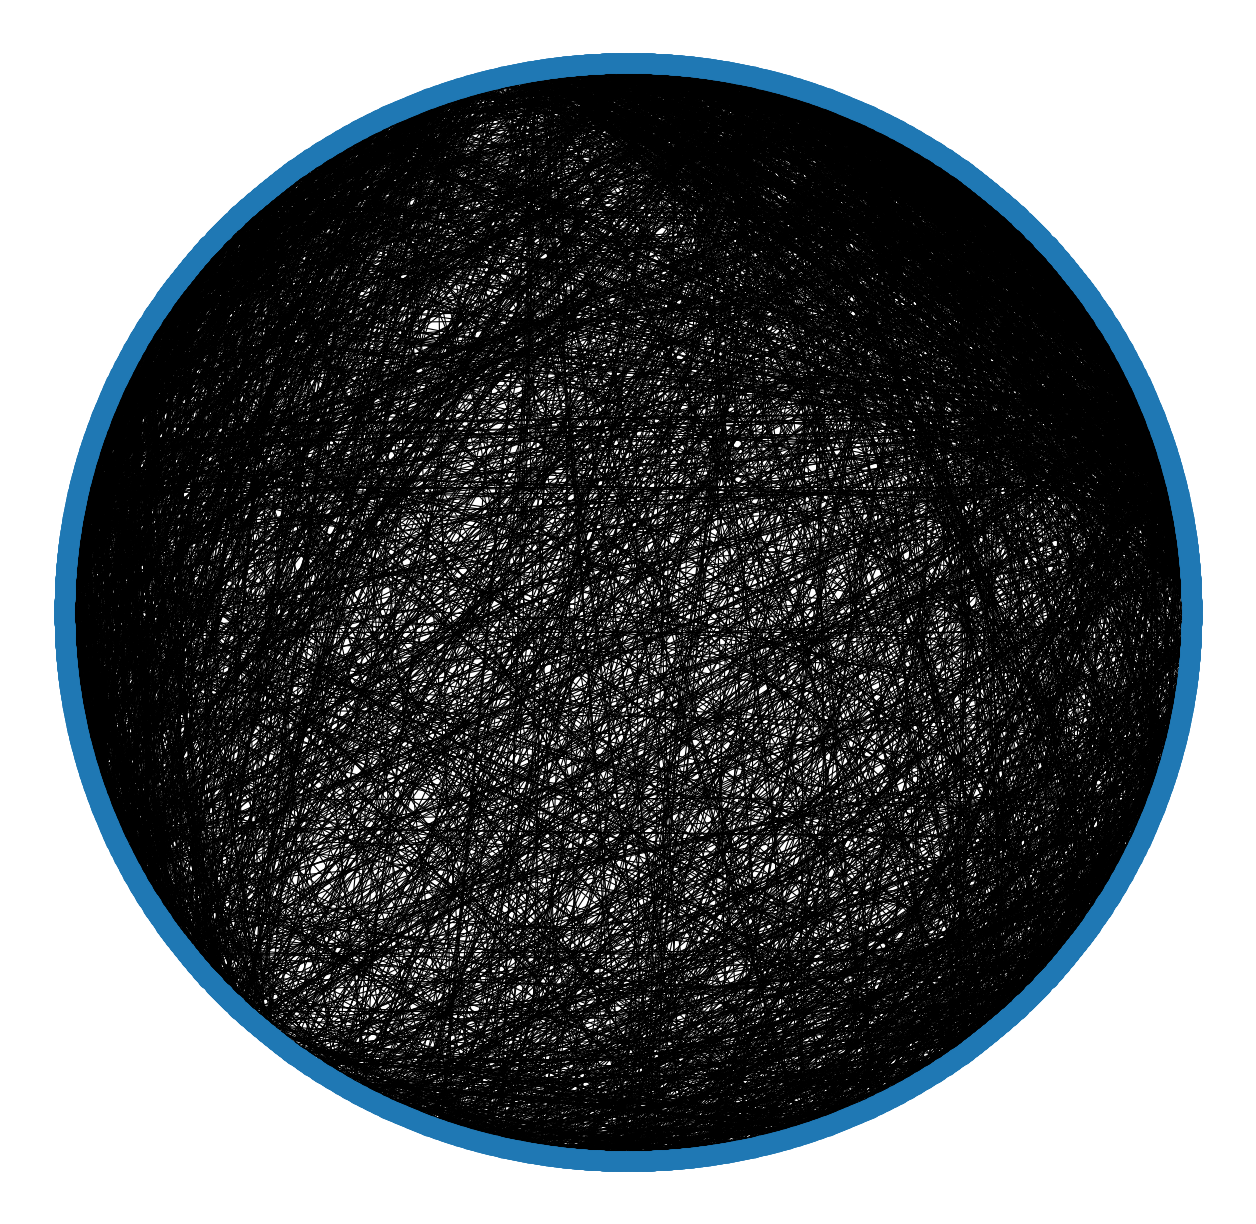

In [15]:
vis_graph(G)

In [16]:
graph_info(G)

Name: 
Type: Graph
Number of nodes: 2708
Number of edges: 5278
Average degree:   3.8981


In [30]:
complex_info(G)

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

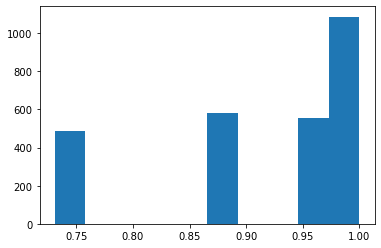

In [55]:
degree_hist(G)

['35', '6213', '3229', '887', '4584', '6214', '1272', '6184', '4330', '1050679']


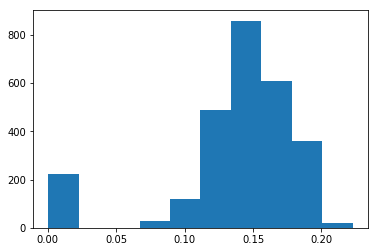

In [48]:
centrality_hist(G)